In [48]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

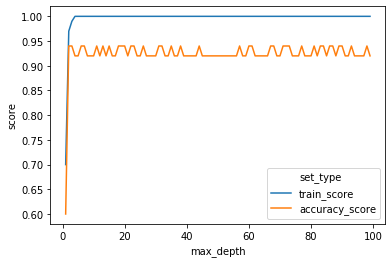

In [95]:
# данные для трейн и тест выборок (index_col=0 - оказался важной штукой, без него всё в 100% уходило)
df_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
df_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

# делим выборки на X (обучаемся) и y (предсказываем)
X_train, y_train = df_train.drop(['species'], axis=1), df_train.species
X_test, y_test = df_test.drop(['species'], axis=1), df_test.species

# что это 
np.random.seed(0)

max_depth_ranges = range(1, 100)

# что это - инициализируем объект датафрейм?
scores_data = pd.DataFrame()

for max_depth in max_depth_ranges:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    
    clf.fit(X_train, y_train)
    
    train_score=clf.score(X_train, y_train)
    
    accuracy_score=clf.score(X_test, y_test)
    
    # зачем временная - чтобы добавить в датафрейм (как объект) свой датафрейм?
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'accuracy_score': [accuracy_score]})
    
    scores_data = scores_data.append(temp_score_data)
    
# что чего новые данные? - чтобы на них создать визуализацию?
# 'set_type' - новая колонка, которая будет объединять 2 количественные колонки со скорами 
# ('train_score' и 'accuracy_score')
# и ее значение будет выводиться в колонке score
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'accuracy_score'],
                                  var_name='set_type', value_name='score')

# график с осями - 
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [96]:
scores_data.head()

,max_depth,train_score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [98]:
scores_data_long.head(122)

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
117,19,accuracy_score,0.94
118,20,accuracy_score,0.94
119,21,accuracy_score,0.92
120,22,accuracy_score,0.94
